# Movie Rating Prediction with Enhanced Visualizations

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
# Load dataset
df = pd.read_csv("IMDb Movies India.csv", encoding='latin1')


In [6]:
# Clean column names
df.columns = df.columns.str.strip()


In [8]:
# Drop rows with missing target
df = df.dropna(subset=['Rating', 'Name'])

In [10]:
# Fill missing values
df['Genre'] = df['Genre'].fillna('Unknown')
df['Director'] = df['Director'].fillna('Unknown')
df['Actor 1'] = df['Actor 1'].fillna('Unknown')

In [12]:
# Convert Votes column to string for cleaning
df['Votes'] = df['Votes'].astype(str)
df = df[df['Votes'].str.contains(r'^\d', na=False)].copy()
df['Votes'] = df['Votes'].str.replace(',', '', regex=False)
df['Votes'] = pd.to_numeric(df['Votes'], errors='coerce')
df['Votes'] = df['Votes'].fillna(df['Votes'].median())


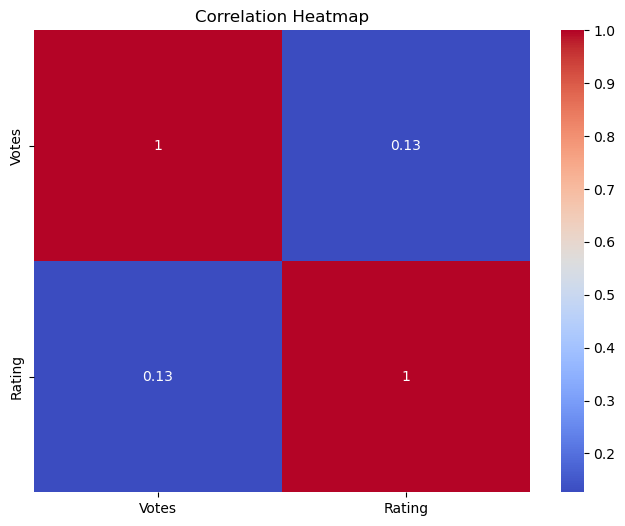

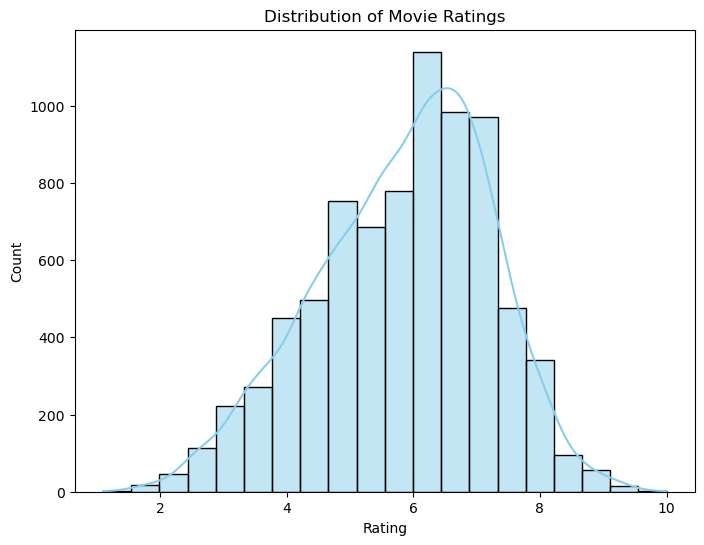

In [14]:
# Visualizations before modeling
plt.figure(figsize=(8, 6))
sns.heatmap(df[['Votes', 'Rating']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

plt.figure(figsize=(8, 6))
sns.histplot(df['Rating'], bins=20, kde=True, color='skyblue')
plt.title("Distribution of Movie Ratings")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

In [16]:
# Feature selection and encoding
features = df[['Genre', 'Director', 'Actor 1', 'Votes']].copy()
target = df['Rating']

le = LabelEncoder()
for col in ['Genre', 'Director', 'Actor 1']:
    features[col] = le.fit_transform(features[col])

In [18]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [20]:
# Train linear regression model
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


In [22]:
# Evaluation
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R-squared Score:", r2_score(y_test, y_pred))


Mean Squared Error: 1.773448247829156
R-squared Score: 0.04609478353248031


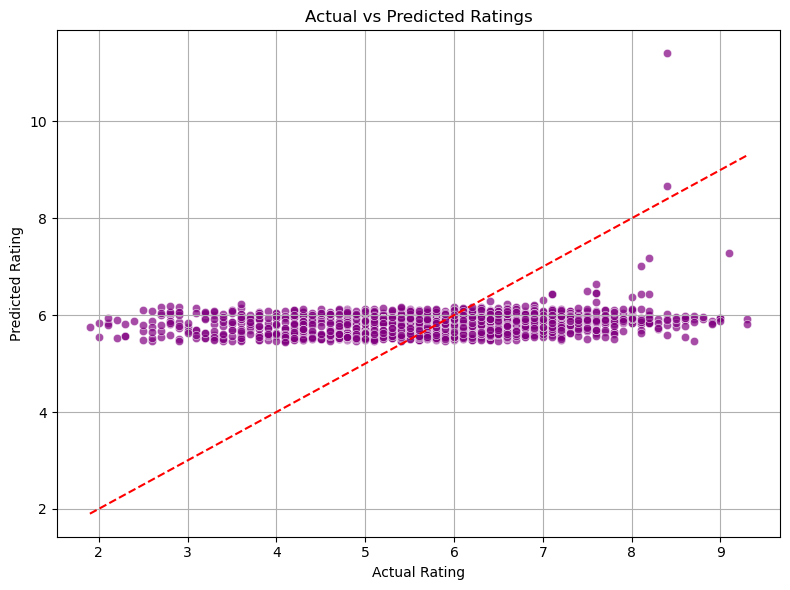

In [24]:
# Actual vs Predicted plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7, color='purple')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Rating")
plt.ylabel("Predicted Rating")
plt.title("Actual vs Predicted Ratings")
plt.grid(True)
plt.tight_layout()
plt.show()

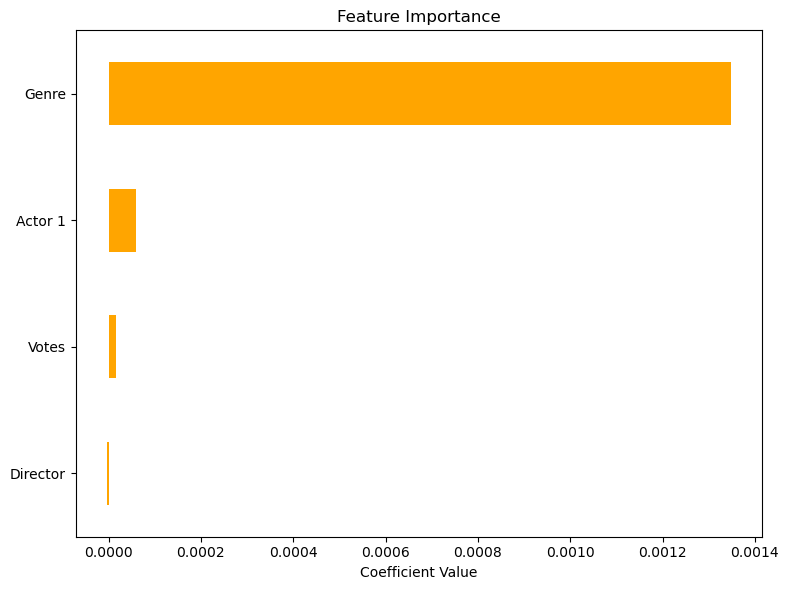

In [26]:
# Feature importance
coefficients = pd.Series(model.coef_, index=features.columns)
plt.figure(figsize=(8, 6))
coefficients.sort_values().plot(kind='barh', color='orange')
plt.title("Feature Importance")
plt.xlabel("Coefficient Value")
plt.tight_layout()
plt.show()


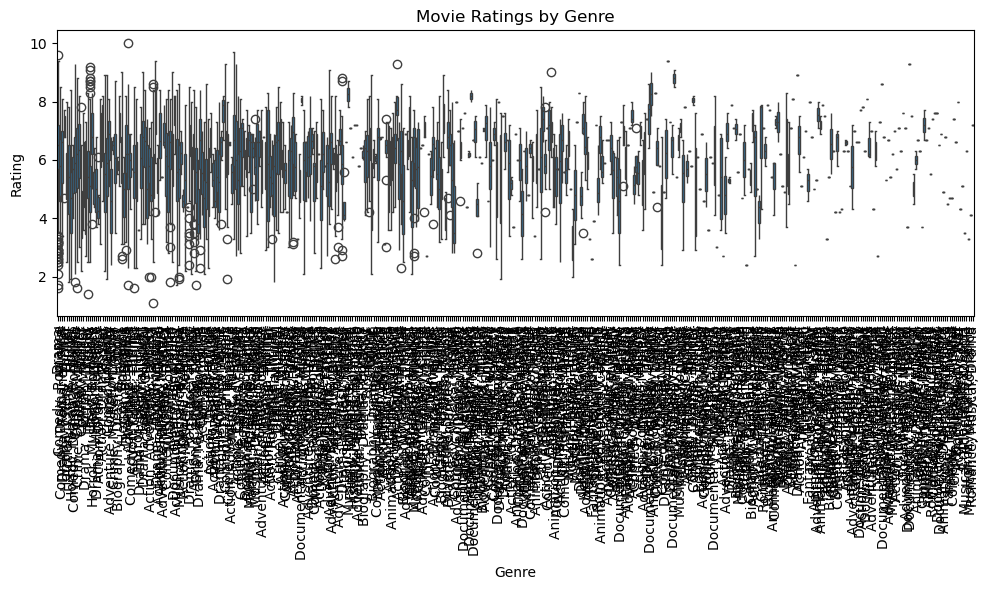

In [28]:
# Boxplot of Genre vs Rating
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Genre', y='Rating')
plt.xticks(rotation=90)
plt.title("Movie Ratings by Genre")
plt.tight_layout()
plt.show()

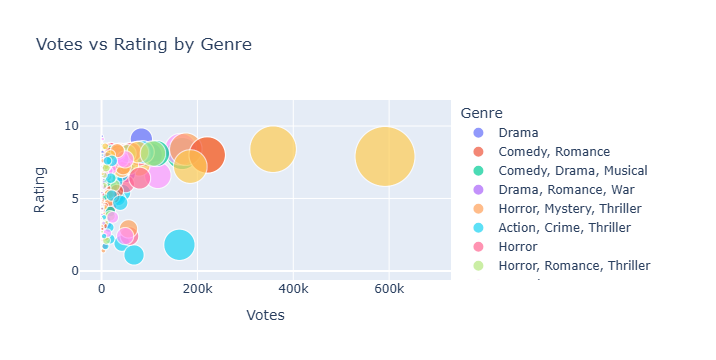

In [30]:
# Interactive Plotly: Votes vs Rating by Genre
fig = px.scatter(
    df, x='Votes', y='Rating',
    size='Votes', color='Genre',
    title="Votes vs Rating by Genre",
    hover_name='Name', size_max=60
)
fig.show()

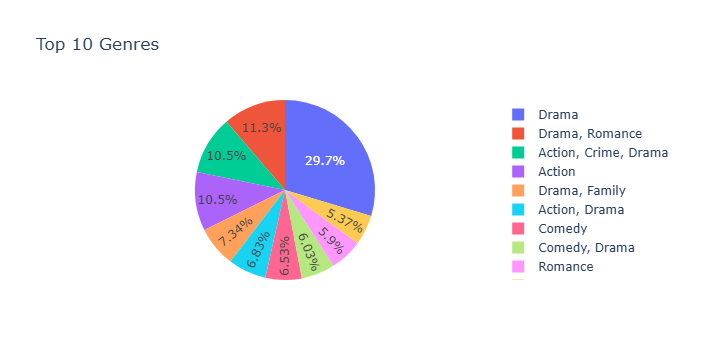

In [32]:
# Interactive Pie Chart: Top 10 Genres
genre_counts = df['Genre'].value_counts().nlargest(10)
fig = px.pie(values=genre_counts.values, names=genre_counts.index, title="Top 10 Genres")
fig.show()
